<a href="https://colab.research.google.com/github/nicolasvazquez95/Aprendiendo_DeepLearning/blob/main/03_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios de Convolución

In [ ]:
# Download images from a Git repo
!git clone https://github.com/nicolasvazquez95/Mate_Taza_Dataset Mate_Taza_Dataset

fatal: destination path 'Mate_Taza_Dataset' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255,)

images_dir = 'Mate_Taza_Dataset/images'

train_data = train_datagen.flow_from_directory(images_dir,class_mode='binary',seed=42)

Found 42 images belonging to 2 classes.


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random,os
random_image = random.sample(os.listdir(images_dir), 1)

# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("Mate_Taza_Dataset/images") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['mate' 'taza']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (1781, 1336, 3)


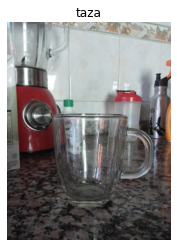

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=images_dir+'/',
                        target_class="taza")

In [ ]:
# Augmented training dataset
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             validation_split=0.2,
                                             #rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             #shear_range=0.2, # shear the image
                                             #zoom_range=0.2, # zoom into the image
                                             #width_shift_range=0.1, # shift the image width ways
                                             #height_shift_range=0.1, # shift the image height ways
                                             #horizontal_flip=True) # flip the image on the horizontal axis
                                             )

test_datagen = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.2)

train_generator = train_datagen_augmented.flow_from_directory(
    images_dir,
    seed=42,
    class_mode='binary',
    batch_size=8,
    subset='training') # set as training data

validation_generator = test_datagen.flow_from_directory(
    images_dir, # same directory as training data
    seed=42,
    class_mode='binary',
    batch_size=4,
    subset='validation') # set as validation data

Found 34 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


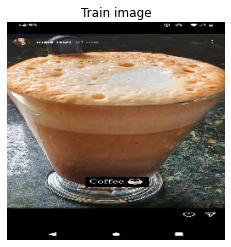

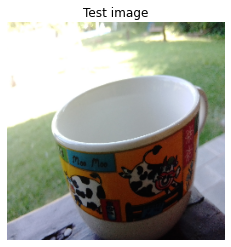

In [ ]:
# Get data batch samples
train_images, train_labels = train_generator.next()
test_images, test_labels = validation_generator.next() # Note: labels aren't augmented, they stay the same

# Show original image and augmented image
random_number = random.randint(0, 3) # we're making batches of size 32, so we'll get a random instance
plt.imshow(train_images[random_number])
plt.title(f"Train image")
plt.axis(False)
plt.figure()
plt.imshow(test_images[random_number])
plt.title(f"Test image")
plt.axis(False);

In [ ]:
# Build the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [ ]:
# Same as model_5 from the notebook, a 2 layer convolutional network
model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(32,3,activation='relu'),
  MaxPool2D(),
  Conv2D(32,3,activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data = validation_generator, 
    validation_steps=len(validation_generator),
    epochs = 10)

Epoch 1/10
5/5 [==============================] - 3s 492ms/step - loss: 0.7322 - accuracy: 0.6176 - val_loss: 0.7262 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 2s 419ms/step - loss: 0.7244 - accuracy: 0.5882 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 2s 530ms/step - loss: 0.6393 - accuracy: 0.6471 - val_loss: 0.7255 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 2s 425ms/step - loss: 0.5770 - accuracy: 0.7353 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 2s 458ms/step - loss: 0.7958 - accuracy: 0.5294 - val_loss: 0.7883 - val_accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 2s 489ms/step - loss: 0.5381 - accuracy: 0.7059 - val_loss: 0.8357 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 2s 501ms/step - loss: 0.4538 - accuracy: 0.7647 - val_loss: 0.8035 - val_accuracy: 0.5000
Epoch 8/10
5/5 [====